In [45]:
## Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
##read the data set
df = pd.read_csv('adult_data.csv')
df.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
kf = df.copy()
kf.columns = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']

In [41]:
##check for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [104]:
## as we can see many 0 values in captial-gain that should be handled

def mod_cap_gain(df):
    df['capital_gain'] = np.where(df['capital_gain']==0,np.nan,df['capital_gain'])
    df['capital_gain'] = np.log(df['capital_gain'])
    df['capital_gain'] = df['capital_gain'].replace(np.nan,0)
    df['capital_gain']
    
mod_cap_gain(df)

## if anyone has any confusion how to use it execute line by line

In [105]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0,40,Cuba,<=50K


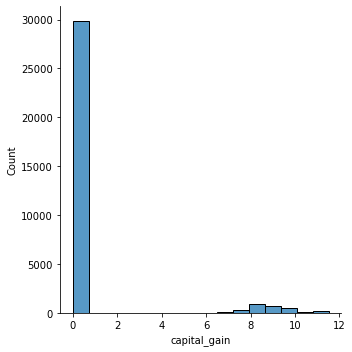

In [46]:
sns.displot(df['capital_gain'])

## Outliers Deletion

### outliers for hours_per_week

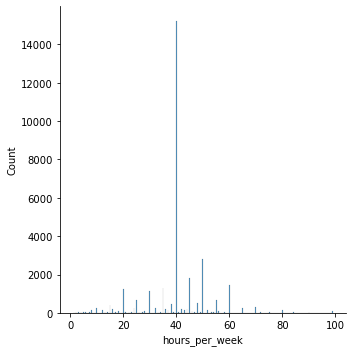

In [49]:
## removing outliers means removing those terms which lie far away from majority which may affect the prediction
sns.displot(df['hours_per_week'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

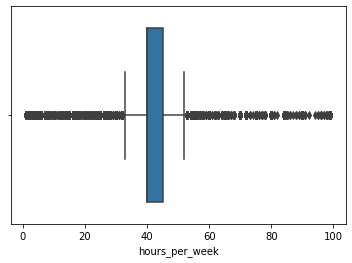

In [50]:
## as we can see there are few outliers we can see more clearly in box plot
sns.boxplot(df['hours_per_week'])

In [106]:
## we have to remove the noie from it

def outliers_hours_per_week(df):
    iqr = df['hours_per_week'].quantile(0.75)-df['hours_per_week'].quantile(0.25)
    lower = df['hours_per_week'].quantile(0.25)-(1.25*iqr)#defining the lower range
    upper = df['hours_per_week'].quantile(0.75)+(1.25*iqr)#defining the upper range
   

    df.loc[df['hours_per_week']<=lower,'hours_per_week']=lower
    df.loc[df['hours_per_week']>=upper,'hours_per_week']=upper
  

In [107]:
outliers_hours_per_week(df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours_per_week'>

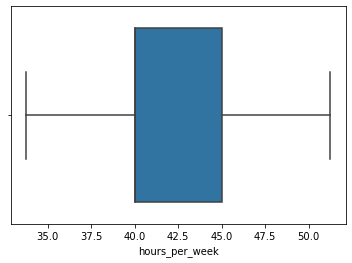

In [62]:
sns.boxplot(df['hours_per_week'])

### outliers for capital loss

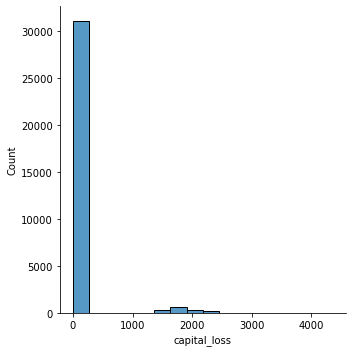

In [68]:
sns.displot(df['capital_loss'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

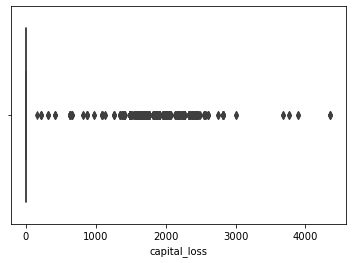

In [69]:
sns.boxplot(df['capital_loss'])

In [72]:
def outliers_capital_loss(df):
    iqr = df['capital_loss'].quantile(0.75)-df['capital_loss'].quantile(0.25)
    lower = df['capital_loss'].quantile(0.25)-(1.5*iqr)
    upper = df['capital_loss'].quantile(0.75)+(1.5*iqr)
    
    df.loc[df['capital_loss']<= lower,'capital_loss'] = lower
    df.loc[df['capital_loss']>= upper,'capital_loss']= upper

In [108]:
outliers_capital_loss(df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_loss'>

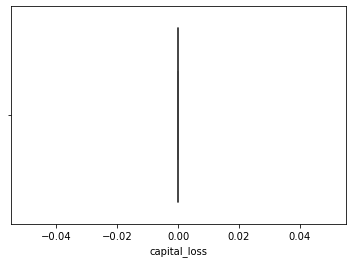

In [74]:
sns.boxplot(df['capital_loss'])

### outliers for education number

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

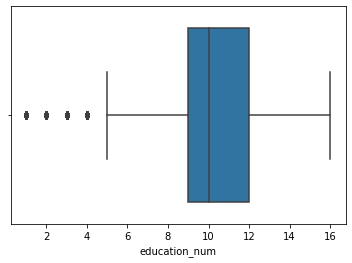

In [75]:
sns.boxplot(df['education_num'])

In [77]:
def outliers_edu_num(df):
    iqr = df['education_num'].quantile(0.75)-df['education_num'].quantile(0.25)
    lower = df['education_num'].quantile(0.25)-(1.5*iqr)
    upper = df['education_num'].quantile(0.75)+(1.5*iqr)
    
    df.loc[df['education_num']<= lower,'education_num'] = lower
    df.loc[df['education_num']>= upper,'education_num']= upper

In [109]:
outliers_edu_num(df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_num'>

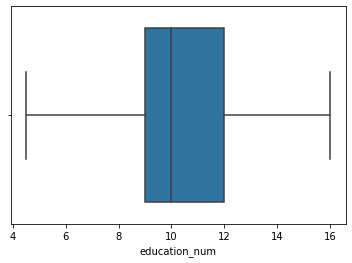

In [80]:
sns.boxplot(df['education_num'])

## Feature Engineering

In [124]:
def feature_engineering(df):
    ##salary
    label_enco_work = { value:key for key,value in enumerate(df['salary'].unique())}
    df['salary'] = df['salary'].map(label_enco_work)
    
    ##occupation
    label_enco_work = { value:key for key,value in enumerate(df['occupation'].unique())}
    df['occupation'] = df['occupation'].map(label_enco_work)
    
    ##native country
    label_enco_work = { value:key for key,value in enumerate(df['native_country'].unique())}
    df['native_country'] = df['native_country'].map(label_enco_work)
    
    ##relationship
    label_enco_work = { value:key for key,value in enumerate(df['relationship'].unique())}
    df['relationship'] = df['relationship'].map(label_enco_work)
    
    ##marital status
    label_enco_work = { value:key for key,value in enumerate(df['marital_status'].unique())}
    df['marital_status'] = df['marital_status'].map(label_enco_work)
    
    ##workclass
    label_enco_work = { value:key for key,value in enumerate(df['workclass'].unique())}
    df['workclass'] = df['workclass'].map(label_enco_work)
    
    ##education
    label_enco_edu = {value:key for key,value in enumerate(df['education'].unique())}
    df['education'] = df['education'].map(label_enco_edu)
    
    ##race
    label_enco_race = {value: key for key, value in enumerate(df['race'].unique())}
    df['race'] = df['race'].map(label_enco_race)
    
    
    ##sex
    label_enco_sex = {value:key for key,value in enumerate(df['sex'].unique())}
    df['sex'] = df['sex'].map(label_enco_sex)



In [125]:
feature_engineering(df)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,0,77516,0,13.0,0,0,0,0,0,7.684324,0,40.00,0,0
1,50,1,83311,0,13.0,1,1,1,0,0,0.000000,0,33.75,0,0
2,38,2,215646,1,9.0,2,2,0,0,0,0.000000,0,40.00,0,0
3,53,2,234721,2,7.0,1,2,1,1,0,0.000000,0,40.00,0,0
4,28,2,338409,0,13.0,1,3,2,1,1,0.000000,0,40.00,1,0


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [128]:
sc = StandardScaler()

In [129]:
X = df.drop("salary",axis=1)
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,0,77516,0,13.0,0,0,0,0,0,7.684324,0,40.00,0
1,50,1,83311,0,13.0,1,1,1,0,0,0.000000,0,33.75,0
2,38,2,215646,1,9.0,2,2,0,0,0,0.000000,0,40.00,0
3,53,2,234721,2,7.0,1,2,1,1,0,0.000000,0,40.00,0
4,28,2,338409,0,13.0,1,3,2,1,1,0.000000,0,40.00,1


In [130]:
y = df['salary']

In [139]:
X =sc.fit_transform(X)

In [140]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
lg = LogisticRegression()

In [143]:
lg.fit(x_train,y_train)

LogisticRegression()

In [144]:
y_pred = lg.predict(x_test)

In [145]:
result = {
    'actual':y_test,
    'predicted':y_pred
}

In [146]:
pd.DataFrame(result)

,actual,predicted
25498,0,0
24593,0,0
26294,0,0
25662,0,0
8725,1,0
...,...,...
6926,0,0
22046,1,1
8395,0,0
20081,0,1


In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [148]:
accuracy_score(y_test,y_pred)

0.8088438507600184

In [149]:
confusion_matrix(y_test,y_pred)

array([[4630,  297],
       [ 948,  638]])

In [150]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.94      0.88      4927\n           1       0.68      0.40      0.51      1586\n\n    accuracy                           0.81      6513\n   macro avg       0.76      0.67      0.69      6513\nweighted avg       0.79      0.81      0.79      6513\n'